In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df=pd.read_csv("../data/smart_meter_data.csv")

In [198]:
df.head()

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,Normal
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,Normal
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,Normal
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,Normal
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,Normal


In [199]:
df.tail()

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label
4995,2024-04-14 01:30:00,0.366839,0.701004,0.362397,0.509174,0.490516,Normal
4996,2024-04-14 02:00:00,0.493568,0.258212,0.677895,0.627889,0.535212,Normal
4997,2024-04-14 02:30:00,0.893818,0.431739,0.688926,0.508038,0.681099,Abnormal
4998,2024-04-14 03:00:00,0.509673,0.592927,0.366151,0.668218,0.710599,Normal
4999,2024-04-14 03:30:00,0.233656,0.612872,0.473481,0.268306,0.555286,Normal


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             5000 non-null   object 
 1   Electricity_Consumed  5000 non-null   float64
 2   Temperature           5000 non-null   float64
 3   Humidity              5000 non-null   float64
 4   Wind_Speed            5000 non-null   float64
 5   Avg_Past_Consumption  5000 non-null   float64
 6   Anomaly_Label         5000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB


In [201]:
df.describe()

,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.376677,0.525069,0.497632,0.464628,0.458738
std,0.164117,0.135603,0.146781,0.120370,0.146749
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265349,0.434253,0.398956,0.382906,0.358857
50%,0.377244,0.524052,0.497539,0.464958,0.457814
75%,0.486002,0.617281,0.595359,0.547419,0.555607
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [202]:
df.isnull().sum()

Timestamp               0
Electricity_Consumed    0
Temperature             0
Humidity                0
Wind_Speed              0
Avg_Past_Consumption    0
Anomaly_Label           0
dtype: int64

In [203]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [204]:
df['hour']=df['Timestamp'].dt.hour
df['day']=df['Timestamp'].dt.day
df['month']=df['Timestamp'].dt.month
df['day_of_week']=df['Timestamp'].dt.dayofweek

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp             5000 non-null   datetime64[ns]
 1   Electricity_Consumed  5000 non-null   float64       
 2   Temperature           5000 non-null   float64       
 3   Humidity              5000 non-null   float64       
 4   Wind_Speed            5000 non-null   float64       
 5   Avg_Past_Consumption  5000 non-null   float64       
 6   Anomaly_Label         5000 non-null   object        
 7   hour                  5000 non-null   int32         
 8   day                   5000 non-null   int32         
 9   month                 5000 non-null   int32         
 10  day_of_week           5000 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(4), object(1)
memory usage: 351.7+ KB


In [206]:
df=df.drop(columns=['Timestamp'])

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Electricity_Consumed  5000 non-null   float64
 1   Temperature           5000 non-null   float64
 2   Humidity              5000 non-null   float64
 3   Wind_Speed            5000 non-null   float64
 4   Avg_Past_Consumption  5000 non-null   float64
 5   Anomaly_Label         5000 non-null   object 
 6   hour                  5000 non-null   int32  
 7   day                   5000 non-null   int32  
 8   month                 5000 non-null   int32  
 9   day_of_week           5000 non-null   int32  
dtypes: float64(5), int32(4), object(1)
memory usage: 312.6+ KB


In [208]:
df.isnull().sum()

Electricity_Consumed    0
Temperature             0
Humidity                0
Wind_Speed              0
Avg_Past_Consumption    0
Anomaly_Label           0
hour                    0
day                     0
month                   0
day_of_week             0
dtype: int64

In [209]:
X=df.drop(columns=['Electricity_Consumed','Anomaly_Label'])

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Electricity_Consumed  5000 non-null   float64
 1   Temperature           5000 non-null   float64
 2   Humidity              5000 non-null   float64
 3   Wind_Speed            5000 non-null   float64
 4   Avg_Past_Consumption  5000 non-null   float64
 5   Anomaly_Label         5000 non-null   object 
 6   hour                  5000 non-null   int32  
 7   day                   5000 non-null   int32  
 8   month                 5000 non-null   int32  
 9   day_of_week           5000 non-null   int32  
dtypes: float64(5), int32(4), object(1)
memory usage: 312.6+ KB


In [211]:
y_reg=df['Electricity_Consumed']
y_clf=df['Anomaly_Label']

In [212]:
X.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Avg_Past_Consumption', 'hour',
       'day', 'month', 'day_of_week'],
      dtype='object')

In [213]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train_reg,y_test_reg=train_test_split(X_scaled,y_reg,test_size=0.2,random_state=42)

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)


In [215]:
X_train_c,X_test_c,y_train_c,y_test_c=train_test_split(X_scaled,y_clf,test_size=0.2,random_state=42)

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [217]:
lr=LinearRegression()
lr.fit(X_train,y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [218]:
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))
r2_lr = r2_score(y_test_reg, y_pred_lr)

print("Linear Regression Performance")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)


Linear Regression Performance
MAE: 0.12405053025459299
RMSE: 0.15435352155894835
R2 Score: 0.07609478009390191


In [219]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train_reg)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [220]:
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
rmse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("Random Forest Performance")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)


Random Forest Performance
MAE: 0.12772219040746405
RMSE: 0.025335011063339862
R2 Score: 0.01753874002807332


In [221]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,0.124051,0.154354,0.076095
1,Random Forest,0.127722,0.025335,0.017539


In [222]:
importances=rf.feature_importances_
feature_names=X.columns
feature_importance_df=pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)
feature_importance_df

,Feature,Importance
3,Avg_Past_Consumption,0.267499
1,Humidity,0.157322
0,Temperature,0.150998
2,Wind_Speed,0.148199
4,hour,0.093620
5,day,0.093469
7,day_of_week,0.054676
6,month,0.034219


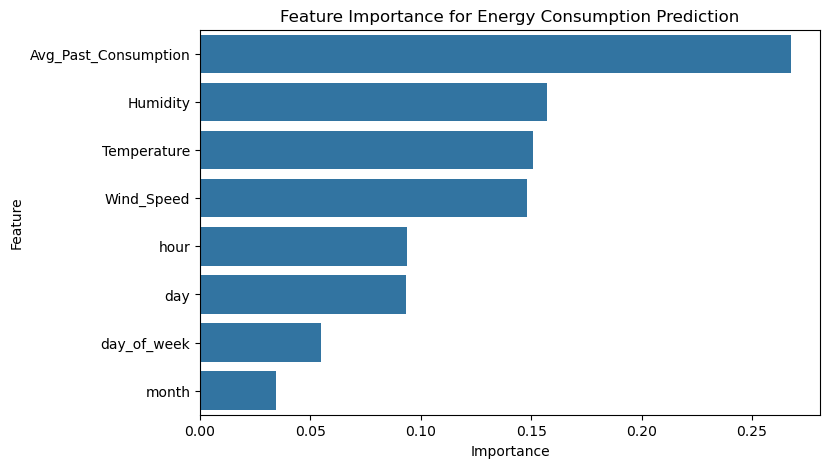

In [232]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df
)
plt.title("Feature Importance for Energy Consumption Prediction")
plt.show()


In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [234]:
log_clf=LogisticRegression(max_iter=1000)
log_clf.fit(X_train_c,y_train_c)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [235]:
y_pred_log = log_clf.predict(X_test_c)

print("Logistic Regression Results")
print(confusion_matrix(y_test_c, y_pred_log))
print(classification_report(y_test_c, y_pred_log))


Logistic Regression Results
[[  0  54]
 [  0 946]]
              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00        54
      Normal       0.95      1.00      0.97       946

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.89      0.95      0.92      1000



C:\Users\ghosh\miniconda3\envs\smart_energy_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ghosh\miniconda3\envs\smart_energy_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ghosh\miniconda3\envs\smart_energy_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

In [236]:
"THE WARNING TELLS THAT THE MODEL IS HIGHLY IMBALANCED FIRST WE NEED TO BALANCE IT."

'THE WARNING TELLS THAT THE MODEL IS HIGHLY IMBALANCED FIRST WE NEED TO BALANCE IT.'

In [237]:
y_clf.value_counts()

Anomaly_Label
Normal      4750
Abnormal     250
Name: count, dtype: int64

In [238]:
log_clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_clf.fit(X_train_c, y_train_c)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [239]:
y_pred_log = log_clf.predict(X_test_c)


In [240]:
print("Logistic Regression Results (Balanced)")
print(confusion_matrix(y_test_c, y_pred_log))
print(classification_report(y_test_c, y_pred_log, zero_division=0))


Logistic Regression Results (Balanced)
[[ 27  27]
 [411 535]]
              precision    recall  f1-score   support

    Abnormal       0.06      0.50      0.11        54
      Normal       0.95      0.57      0.71       946

    accuracy                           0.56      1000
   macro avg       0.51      0.53      0.41      1000
weighted avg       0.90      0.56      0.68      1000



In [241]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_clf.fit(X_train_c, y_train_c)

y_pred_rf = rf_clf.predict(X_test_c)

print("Random Forest Classifier Results")
print(confusion_matrix(y_test_c, y_pred_rf))
print(classification_report(y_test_c, y_pred_rf, zero_division=0))


Random Forest Classifier Results
[[ 11  43]
 [  0 946]]
              precision    recall  f1-score   support

    Abnormal       1.00      0.20      0.34        54
      Normal       0.96      1.00      0.98       946

    accuracy                           0.96      1000
   macro avg       0.98      0.60      0.66      1000
weighted avg       0.96      0.96      0.94      1000



In [242]:
df['Expected_Consumption'] = rf.predict(X_scaled)


In [243]:
df['Energy_Wasted'] = df['Electricity_Consumed'] - df['Expected_Consumption']


In [244]:
total_waste = df['Energy_Wasted'].sum()

if total_waste > 0:
    print("Energy WASTAGE detected")
    print("Total Energy Wasted:", round(total_waste, 2))
else:
    print("No energy wastage detected")


No energy wastage detected


In [245]:
waste_by_hour = df.groupby('hour')['Energy_Wasted'].sum()

print("\nEnergy Wastage by Hour:")
print(waste_by_hour)



Energy Wastage by Hour:
hour
0     1.839056
1     0.441192
2     1.899526
3    -1.440828
4    -0.046371
5    -0.314406
6    -0.327124
7     0.192442
8     0.918699
9     0.526466
10   -1.032390
11    1.454586
12   -0.261618
13   -0.990784
14   -1.350044
15   -0.006639
16   -0.478116
17   -2.022146
18    0.760097
19   -0.211067
20   -0.764137
21   -0.297308
22   -2.445835
23   -0.879170
Name: Energy_Wasted, dtype: float64


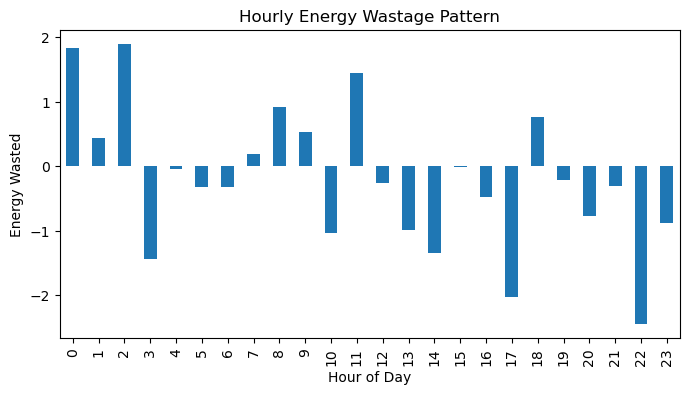

In [246]:
waste_by_hour.plot(kind='bar', figsize=(8,4))
plt.xlabel("Hour of Day")
plt.ylabel("Energy Wasted")
plt.title("Hourly Energy Wastage Pattern")
plt.show()


In [247]:
def energy_action(row):
    if row['Energy_Wasted'] == 0:
        return "Normal usage – no action required"

    actions = []

    if row['hour'] < 6 or row['hour'] > 22:
        actions.append("Switch OFF non-essential loads (off-hours)")

    if row['Energy_Wasted'] > 0.2 * row['Avg_Past_Consumption']:
        actions.append("Inspect equipment for faults or leakage")

    if row['Anomaly_Label'] == 1:
        actions.append("Trigger alert for manual inspection")

    return "; ".join(actions)


In [248]:
df['Corrective_Action'] = df.apply(energy_action, axis=1)


In [249]:
waste_cases = df[df['Energy_Wasted'] > 0][
    ['Electricity_Consumed',
     'Expected_Consumption',
     'Energy_Wasted',
     'hour',
     'Corrective_Action']
].head(5)

print(waste_cases)


   Electricity_Consumed  Expected_Consumption  Energy_Wasted  hour  \
2              0.482948              0.459751       0.023198     1   
3              0.628838              0.558077       0.070761     1   
6              0.638202              0.601342       0.036860     3   
7              0.502906              0.485212       0.017694     3   
9              0.465427              0.449630       0.015796     4   

                            Corrective_Action  
2  Switch OFF non-essential loads (off-hours)  
3  Switch OFF non-essential loads (off-hours)  
6  Switch OFF non-essential loads (off-hours)  
7  Switch OFF non-essential loads (off-hours)  
9  Switch OFF non-essential loads (off-hours)  
